In [94]:
from indigo import Indigo
import pandas as pd
from ord_data_load import ORD_PATH
from chem_render import draw_reaction
from IPython.display import SVG

#to disable warnings
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:
indigo = Indigo()
indigo.version()

'1.9.0.0-gca3f2ab4a-x86_64-win-msvc-1934'

In [96]:
all_reactions = pd.read_pickle(f'{ORD_PATH}/all_reactions.pkl')

In [97]:
%%time
pd_mask = pd.read_csv(f'{ORD_PATH}/pd_mask.csv.zst', index_col="id").squeeze()
pd_df = all_reactions[pd_mask]
pd_df.head()

CPU times: total: 2.19 s
Wall time: 2.16 s


,reaction_smile,solvents,reactants,catalysts,reagents,temperature,time,product,yield,notes,patent,original_dataset
id,,,,,,,,,,,,
ord-56b1f4bfeebc4b8ab990b9804e798aa7,CCOC1=C(C=C2C(=C1)N=CC(=C2NC3=C(C=C(C=C3)F)F)C...,[],"[[None, CCOC1=C(C=C2C(=C1)N=CC(=C2NC3=C(C=C(C=...","[[None, C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=C(C4=CC=...","[[None, C(=O)([O-])[O-].[Cs+].[Cs+]]]",110.0,None,CCOC1=C(C=C2C(=C1)N=CC(=C2NC3=C(C=C(C=C3)F)F)C...,65.39,"To a solution of ethyl 6-bromo-4-(2,4-difluoro...",None,ord_dataset-00005539a1e04c809a9a78647bea649c
ord-1169cbe9fa064a879ac34b2e524a4e69,CN1C=NC2=C1C=C(C(=C2F)N)C(=O)OC.C1=CC=C(C=C1)I...,"[[None, COC1=CC=CC=C1]]","[[None, CN1C=NC2=C1C=C(C(=C2F)N)C(=O)OC], [Non...","[[None, CC1(C2=C(C(=CC=C2)P(C3=CC=CC=C3)C4=CC=...","[[None, C(=O)([O-])[O-].[Cs+].[Cs+]]]",100.0,None,CN1C=NC2=C1C=C(C(=C2F)NC3=CC=CC=C3)C(=O)OC,57.47,"9,9-Dimethyl-4,5-bis(diphenylphosphino)xanthen...",None,ord_dataset-00005539a1e04c809a9a78647bea649c
ord-13992005c22d4673aa802b5e140076e8,CN1C=NC2=C1C=C(C(=C2F)N)C(=O)OC.C1=CC=C(C=C1)I...,"[[None, COC1=CC=CC=C1]]","[[None, CN1C=NC2=C1C=C(C(=C2F)N)C(=O)OC], [Non...","[[None, CC1(C2=C(C(=CC=C2)P(C3=CC=CC=C3)C4=CC=...","[[None, C(=O)([O-])[O-].[Cs+].[Cs+]]]",100.0,None,CN1C=NC2=C1C=C(C(=C2F)NC3=CC=CC=C3)C(=O)OC,65.43,"9,9-Dimethyl-4,5-bis(diphenylphosphino)xanthen...",None,ord_dataset-00005539a1e04c809a9a78647bea649c
ord-a36b48917c9942d1a34637511773ee1f,CN1C=NC2=C1C=C(C(=C2F)N)C(=O)OC.C1=CC=C(C=C1)I...,"[[None, COC1=CC=CC=C1]]","[[None, CN1C=NC2=C1C=C(C(=C2F)N)C(=O)OC], [Non...","[[None, CC1(C2=C(C(=CC=C2)P(C3=CC=CC=C3)C4=CC=...","[[None, C(=O)([O-])[O-].[Cs+].[Cs+]]]",100.0,None,CN1C=NC2=C1C=C(C(=C2F)NC3=CC=CC=C3)C(=O)OC,75.07,"9,9-Dimethyl-4,5-bis(diphenylphosphino)xanthen...",None,ord_dataset-00005539a1e04c809a9a78647bea649c
ord-5fc624fd97b7430eafbe8dcc049d170b,CC1=NC(=C(C=C1)OC2=CC(=NC=C2)Cl)C.C1=CC(=CC=C1...,"[[None, CC(=O)N(C)C]]","[[None, CC1=NC(=C(C=C1)OC2=CC(=NC=C2)Cl)C], [N...","[[None, CC1(C2=C(C(=CC=C2)P(C3=CC=CC=C3)C4=CC=...","[[None, C(=O)([O-])[O-].[Cs+].[Cs+]]]",150.0,None,CC1=NC(=C(C=C1)OC2=CC(=NC=C2)NC3=CC=C(C=C3)S(=...,46.32,"3-(2-chloropyridin-4-yloxy)-2,6-dimethylpyrid...",None,ord_dataset-00005539a1e04c809a9a78647bea649c


In [98]:
rxn_smile = pd_df.iloc[3000]['reaction_smile']
rxn_smile

'[C:1]([O:5][C:6](=[O:34])[C:7](=[CH:19][C@H:20]1[CH2:25][CH2:24][C@H:23]([NH:26][C:27]([O:29][C:30]([CH3:33])([CH3:32])[CH3:31])=[O:28])[CH2:22][CH2:21]1)[CH2:8][C:9]([O:11]CC1C=CC=CC=1)=[O:10])([CH3:4])([CH3:3])[CH3:2]>C(O)C.[Pd]>[C:1]([O:5][C:6](=[O:34])[CH:7]([CH2:19][C@H:20]1[CH2:25][CH2:24][C@H:23]([NH:26][C:27]([O:29][C:30]([CH3:33])([CH3:32])[CH3:31])=[O:28])[CH2:22][CH2:21]1)[CH2:8][C:9]([OH:11])=[O:10])([CH3:3])([CH3:4])[CH3:2]'

In [99]:
rxn = indigo.loadReaction(rxn_smile)
rxn

In [100]:
from indigo.renderer import IndigoRenderer

renderer = IndigoRenderer(indigo)

indigo.setOption("render-output-format", "svg")
indigo.setOption("render-coloring", True)
indigo.setOption("render-relative-thickness", 1.5)

CPU times: total: 31.2 ms
Wall time: 39 ms


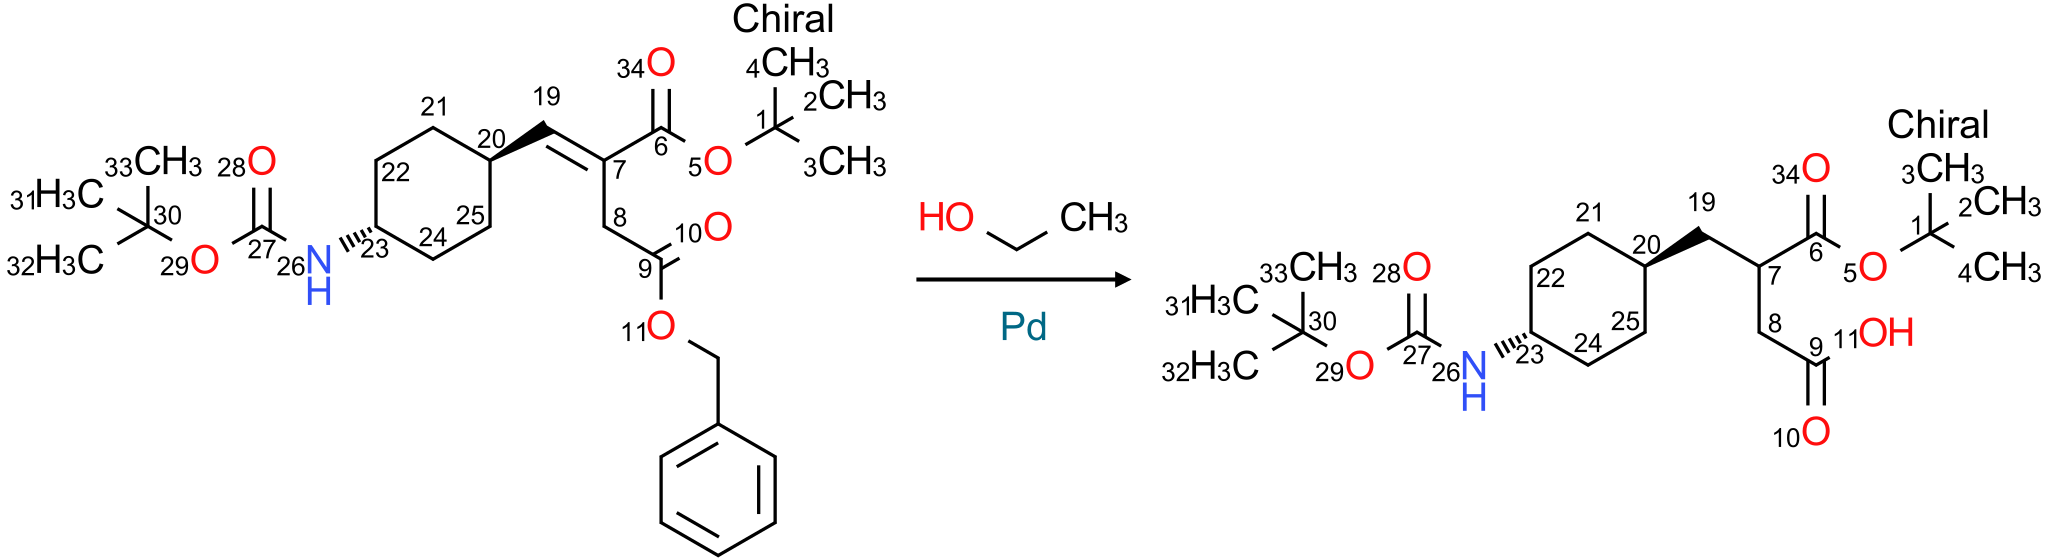

In [101]:
%%time
SVG(renderer.renderToBuffer(rxn))

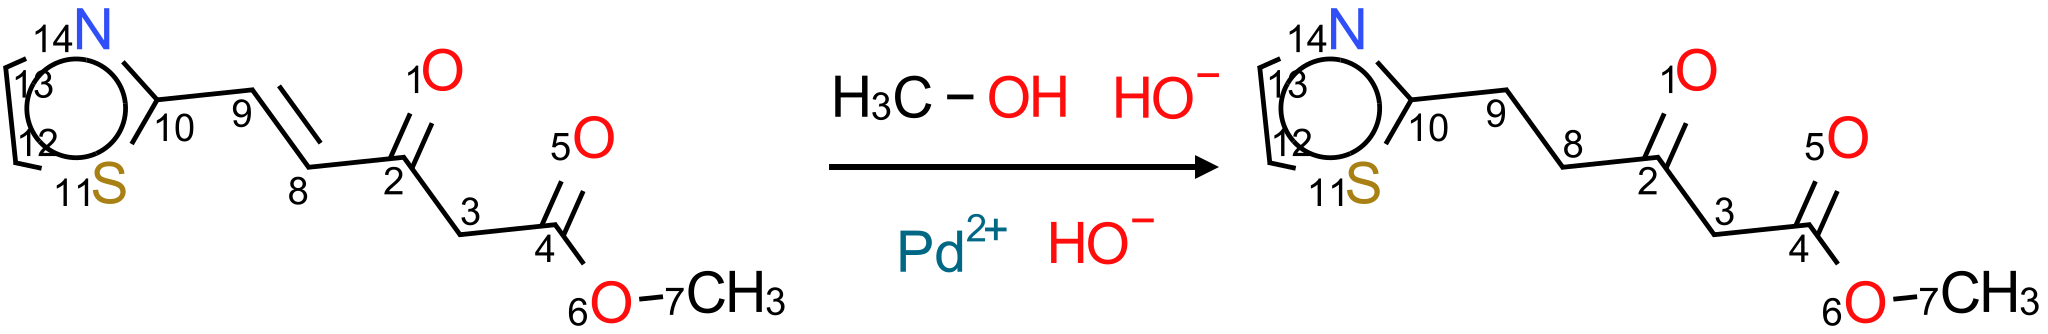

In [138]:
rxn = indigo.loadReaction(pd_df['reaction_smile'].sample().iat[0])
rxn.aromatize()
SVG(renderer.renderToBuffer(rxn))

In [103]:
BUCHWALD_RXN_SMARTS = "[c:1]-[Br,Cl,I].[N,n:2]>>[c:1]-[N,n:2]"
query = indigo.loadReactionSmarts(BUCHWALD_RXN_SMARTS)
query.optimize()

idx = 21815
# idx = np.random.randint(0, len(pd_df))
rxn = indigo.loadReaction(pd_df.iloc[idx]['reaction_smile'])

# match = indigo.substructureMatcher(rxn, "DAYLIGHT-AAM").match(query)
match = indigo.substructureMatcher(rxn).match(query)
if match:
    print(idx)
    display(SVG(renderer.renderToBuffer(rxn)))

    #     for bond in mol.iterateBonds():
    #         if match.mapBond(bond):
    #             print(f"atom {bond.index()} matched")

In [104]:
def rxn_match(rxn_smiles, rxn_query) -> bool:
    if rxn_smiles is None:
        return False
    return True if indigo.substructureMatcher(indigo.loadReaction(rxn_smiles)).match(rxn_query) else False

In [105]:
%%time
mask = pd_df['reaction_smile'].apply(rxn_match, rxn_query=query)
buchwald_df = pd_df[mask].copy()
len(buchwald_df)

CPU times: total: 2min 52s
Wall time: 2min 52s


16009

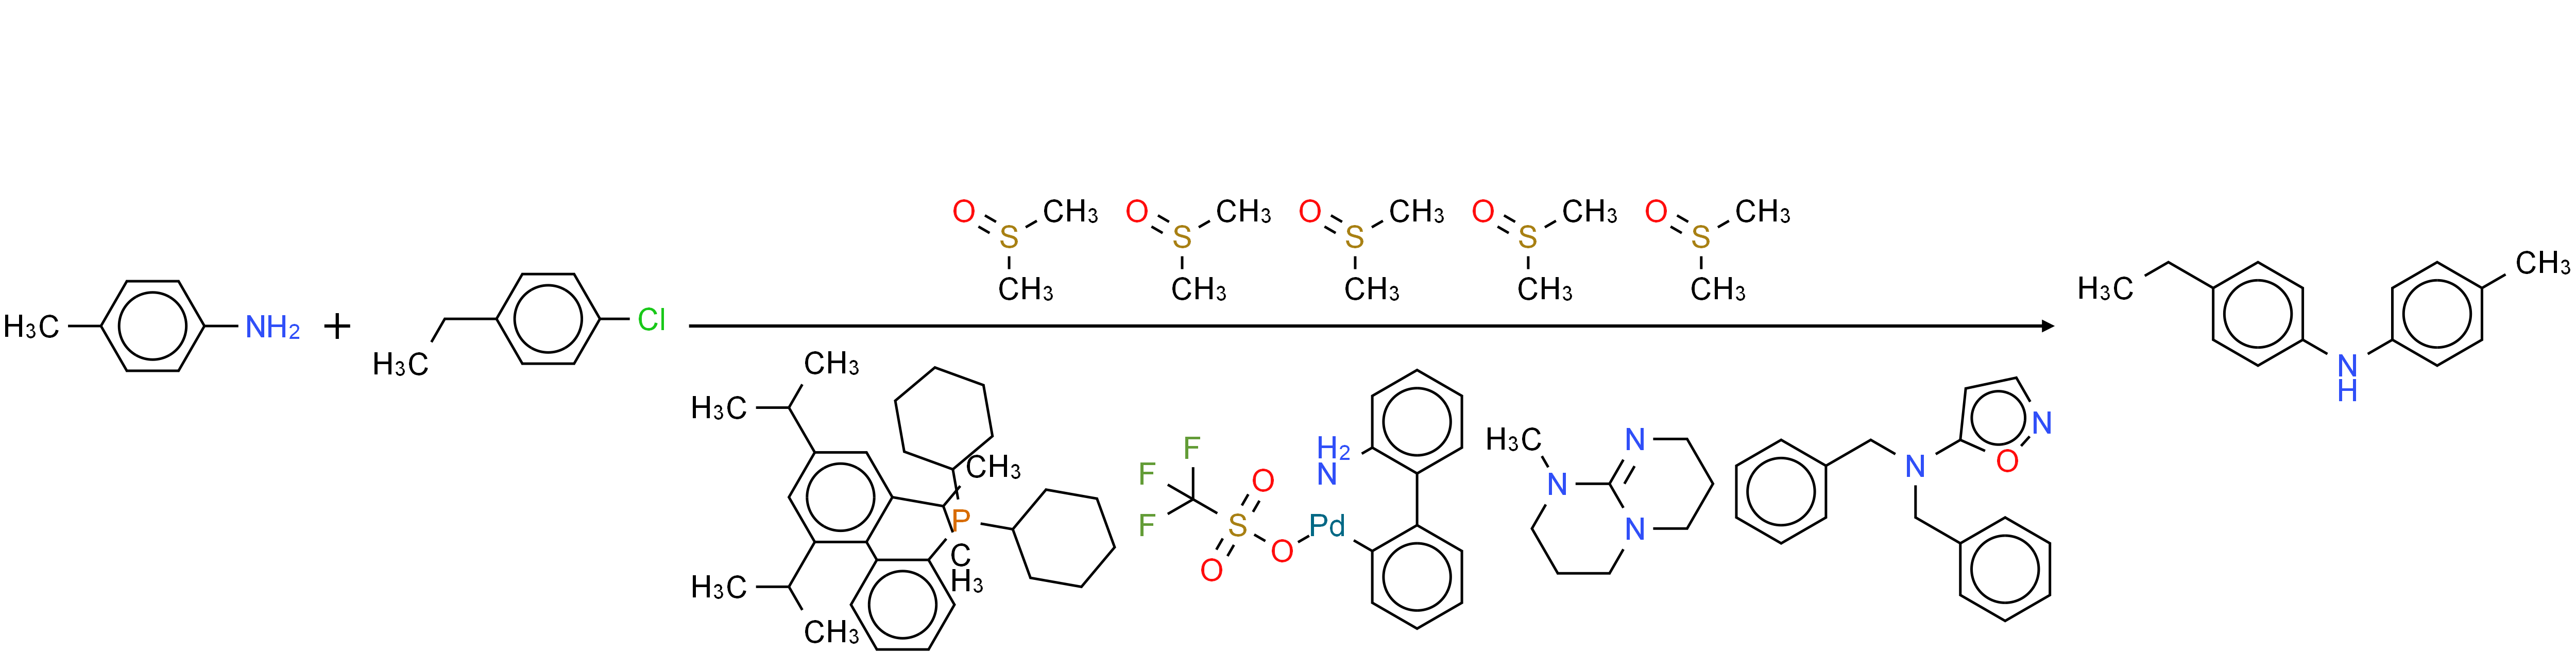

Patent:       None
Reaction_id:  ord-74be7720996142cc85f07f420c91aaaa
These solutions were added to a 384-
well source plate (80 µL per well). The Mosquito HTS liquid handling robot was used to dose
each of these solutions (200 nL each) into a 1536-well plate.
CPU times: total: 359 ms
Wall time: 361 ms


In [106]:
%%time
draw_reaction(buchwald_df)

## Compare Suzuki substructure searches for Pd containing set

In [107]:
%%time
# indigo reaction search
SUZUKI_PATTERN = "[B;X3,4]-[C,c:1].[C,c:2]-[Cl,Br,I,O]>>[C,c:1]-[C,c:2]"

query = indigo.loadReactionSmarts(SUZUKI_PATTERN)
query.optimize()
suzuki_indigo = pd_df['reaction_smile'].apply(rxn_match, rxn_query=query)
suzuki_indigo.sum()

CPU times: total: 2min 58s
Wall time: 2min 58s


39909

In [108]:
def rxn_match_aam(rxn_smiles, rxn_query) -> bool:
    if rxn_smiles is None:
        return False
    return True if indigo.substructureMatcher(indigo.loadReaction(rxn_smiles), "DAYLIGHT-AAM").match(rxn_query) else False

suzuki_indigo_aam = pd_df['reaction_smile'].apply(rxn_match_aam, rxn_query=query)
suzuki_indigo_aam.sum()

34454

In [110]:
%%time
# rdkit reaction search
from ord_data_load import is_reaction_of_type
from rdkit.Chem.AllChem import ReactionFromSmarts

rdkit_pattern = ReactionFromSmarts(SUZUKI_PATTERN)

suzuki_rdkit = pd_df['reaction_smile'].apply(is_reaction_of_type, reaction_type_pattern=rdkit_pattern)
suzuki_rdkit.sum()

CPU times: total: 1min 52s
Wall time: 1min 52s


33300

In [111]:
print("{indigo}          : ", suzuki_indigo.sum())
print("{rdkit}           : ", suzuki_rdkit.sum())
print("{indigo} - {rdkit}: ", (suzuki_indigo & ~suzuki_rdkit).sum())
print("{rdkit} - {indigo}: ", (suzuki_rdkit & ~suzuki_indigo).sum())
print("{rdkit} ∪ {indigo}: ", (suzuki_rdkit | suzuki_indigo).sum())
print("{rdkit} ∩ {indigo}: ", (suzuki_rdkit & suzuki_indigo).sum())

{indigo}          :  39909
{rdkit}           :  33300
{indigo} - {rdkit}:  10738
{rdkit} - {indigo}:  4129
{rdkit} ∪ {indigo}:  44038
{rdkit} ∩ {indigo}:  29171


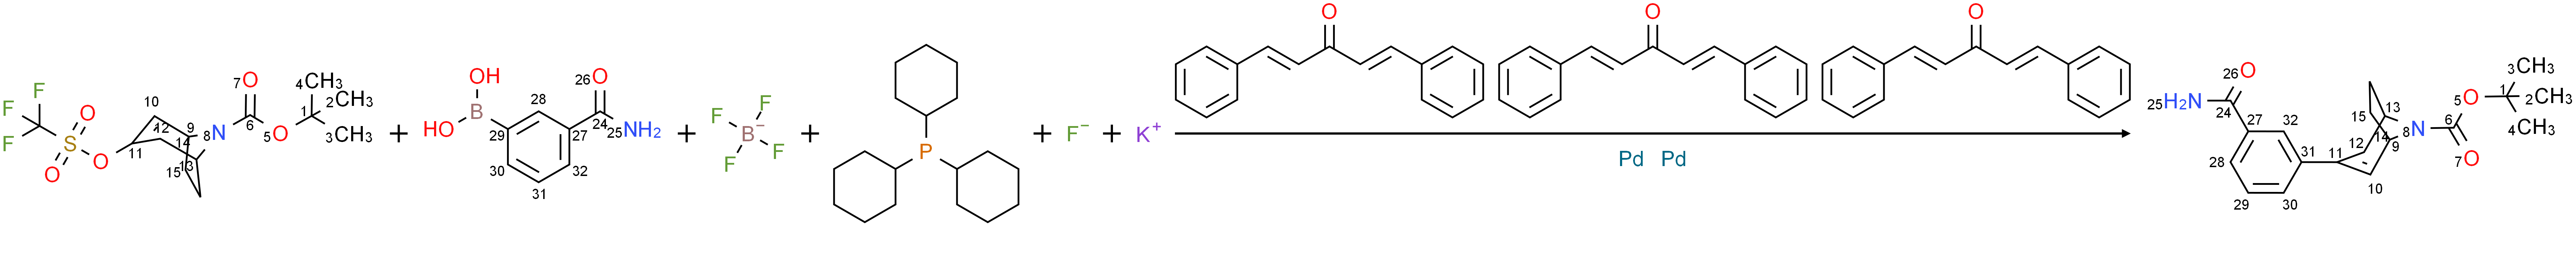

Patent:       US08476440B2
Reaction_id:  ord-1e8d41cd64a64381a35b708a4b199825
To a 250 mL flask was added 3-trifluoromethanesulfonyloxy-8-azabicyclo[3.2.1]oct-2-ene-8-carboxylic acid tert-butyl ester (20 g, 56 mmol), 3-carbamoylphenyl boronic acid (10.2 g, 61 mmol), tris(dibenzylideneacetone)dipalladium(0) (Pd2dba3) (2 g, 2.2 mmol), tricyclohexylphosphine tetrafluoroborate (PCy3HBF4) (1.65 g, 4.4 mmol) and KF (9.8 g, 168 mmol). The reagents were purged with nitrogen for 5 min, and then THF (120 mL) and DMF (30 mL) was added. The suspension was stirred and purged with nitrogen for another 5 min, then heated to 70° C. After 2 h at 70° C., the mixture was cooled to room temperature and filtered through Celite. The filtrate was concentrated and the residue was partitioned between EtOAc (350 mL) and 0.5 N NaOH (400 mL)/brine (50 mL). The organic layer was separated and dried with Na2SO4. A quarter of the solution was removed. The remainder of the solution was concentrated to ˜100 mL to whic

In [112]:
### indigo vs rdkit ###
# unique to rdkit
draw_reaction(pd_df[suzuki_rdkit & ~suzuki_indigo])

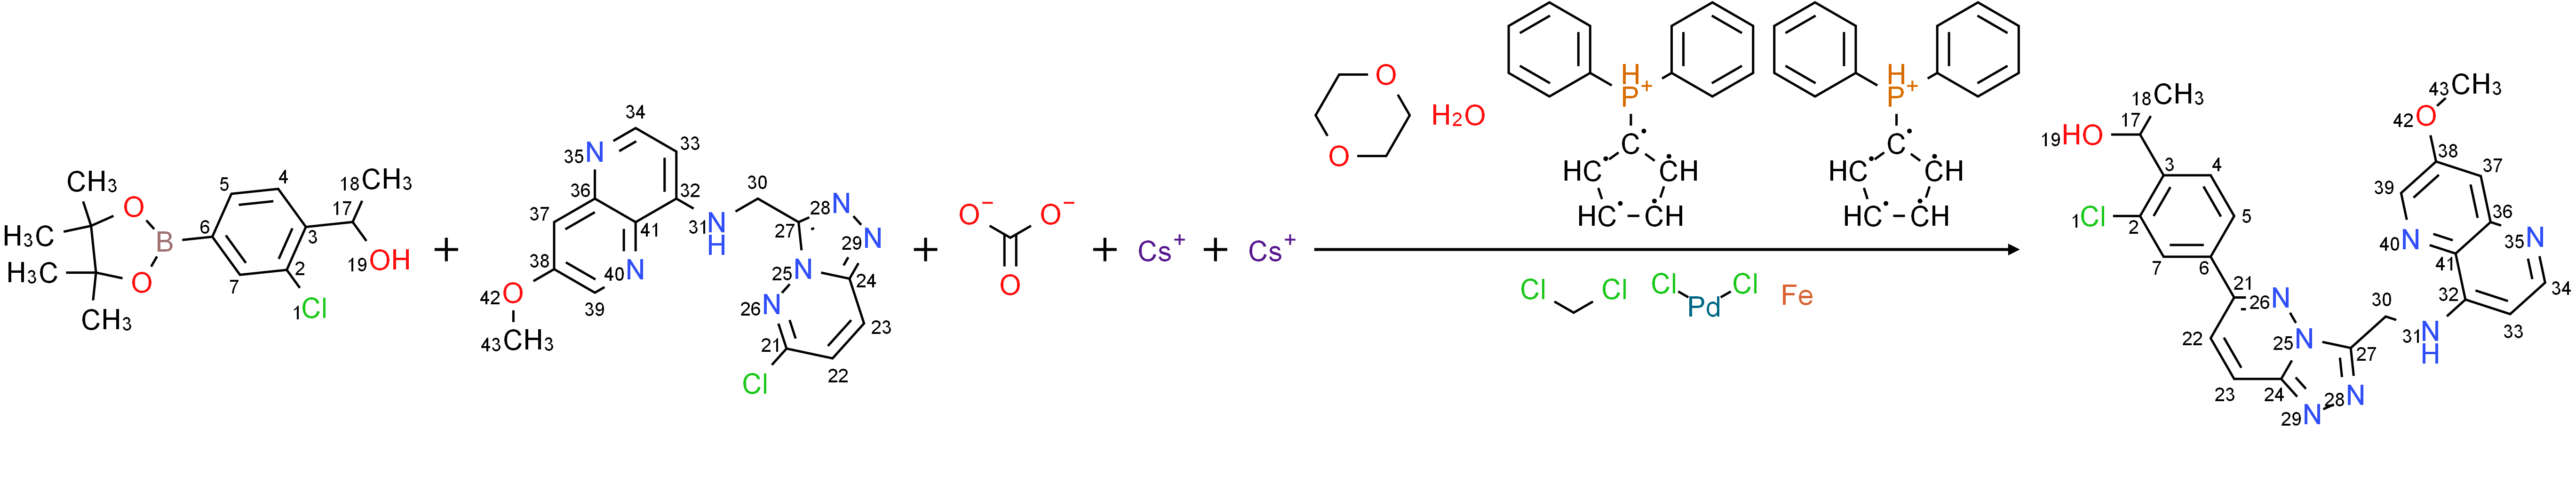

Patent:       US08524900B2
Reaction_id:  ord-48e4ac7d27ae422c99ad679a6ab05836
A suspension of 1-(2-chloro-4-(4,4,5,5-tetramethyl-1,3,2-dioxaborolan-2-yl)phenyl)ethanol (228 mg, 807 μmol), N-((6-chloro-[1,2,4]triazolo[4,3-b]pyridazin-3-yl)methyl)-7-methoxy-1,5-naphthyridin-4-amine (197 mg, 576 μmol), dichloro[1,1′bis(diphenylphoshino)ferrocene]palladium(ii)dichloromethane adduct (127 mg, 173 μmol), cesium carbonate (751 mg, 2306 μmol) in dioxane (3 mL) and water (0.6 mL) was sparged with argon for 5 min then heated to 100° C. for 6 h. Reaction cooled then partitioned between 9:1 CHCl3/IPA (20 mL) and 1M NaOH (15 mL). Aqueous further extracted with 9:1 CHCl3/IPA (2×10 mL). The combined organics dried over MgSO4. concentrated, then purified on 40 g silica eluting with an isocratic 7% 2M NH3 in MeOH/DCM. Product further purified prep HPLC eluting with water/ACN (0.1% TFA). After collected fractions were reduced to a clear the residue was dissolved in 1:1 ACN/water and pH adjusted to 9 with

In [113]:
#unique to indigo
draw_reaction(pd_df[suzuki_indigo & ~suzuki_rdkit])

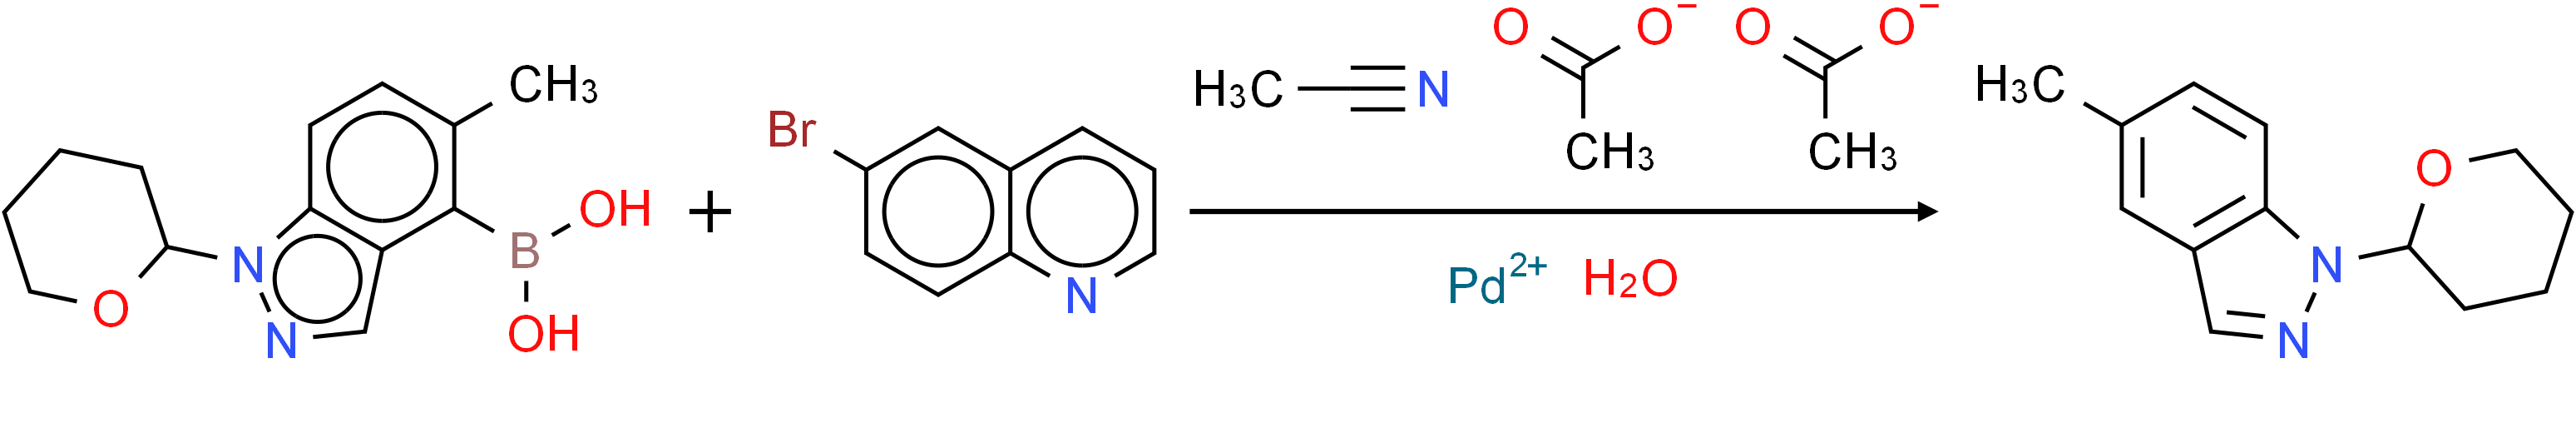

Patent:       None
Reaction_id:  ord-c09a229deb5f49eb8ff4986ae43e5519
None


In [114]:
# indigo "DAYLIGHT-AAM" vs default
draw_reaction(pd_df[suzuki_indigo & ~suzuki_indigo_aam])

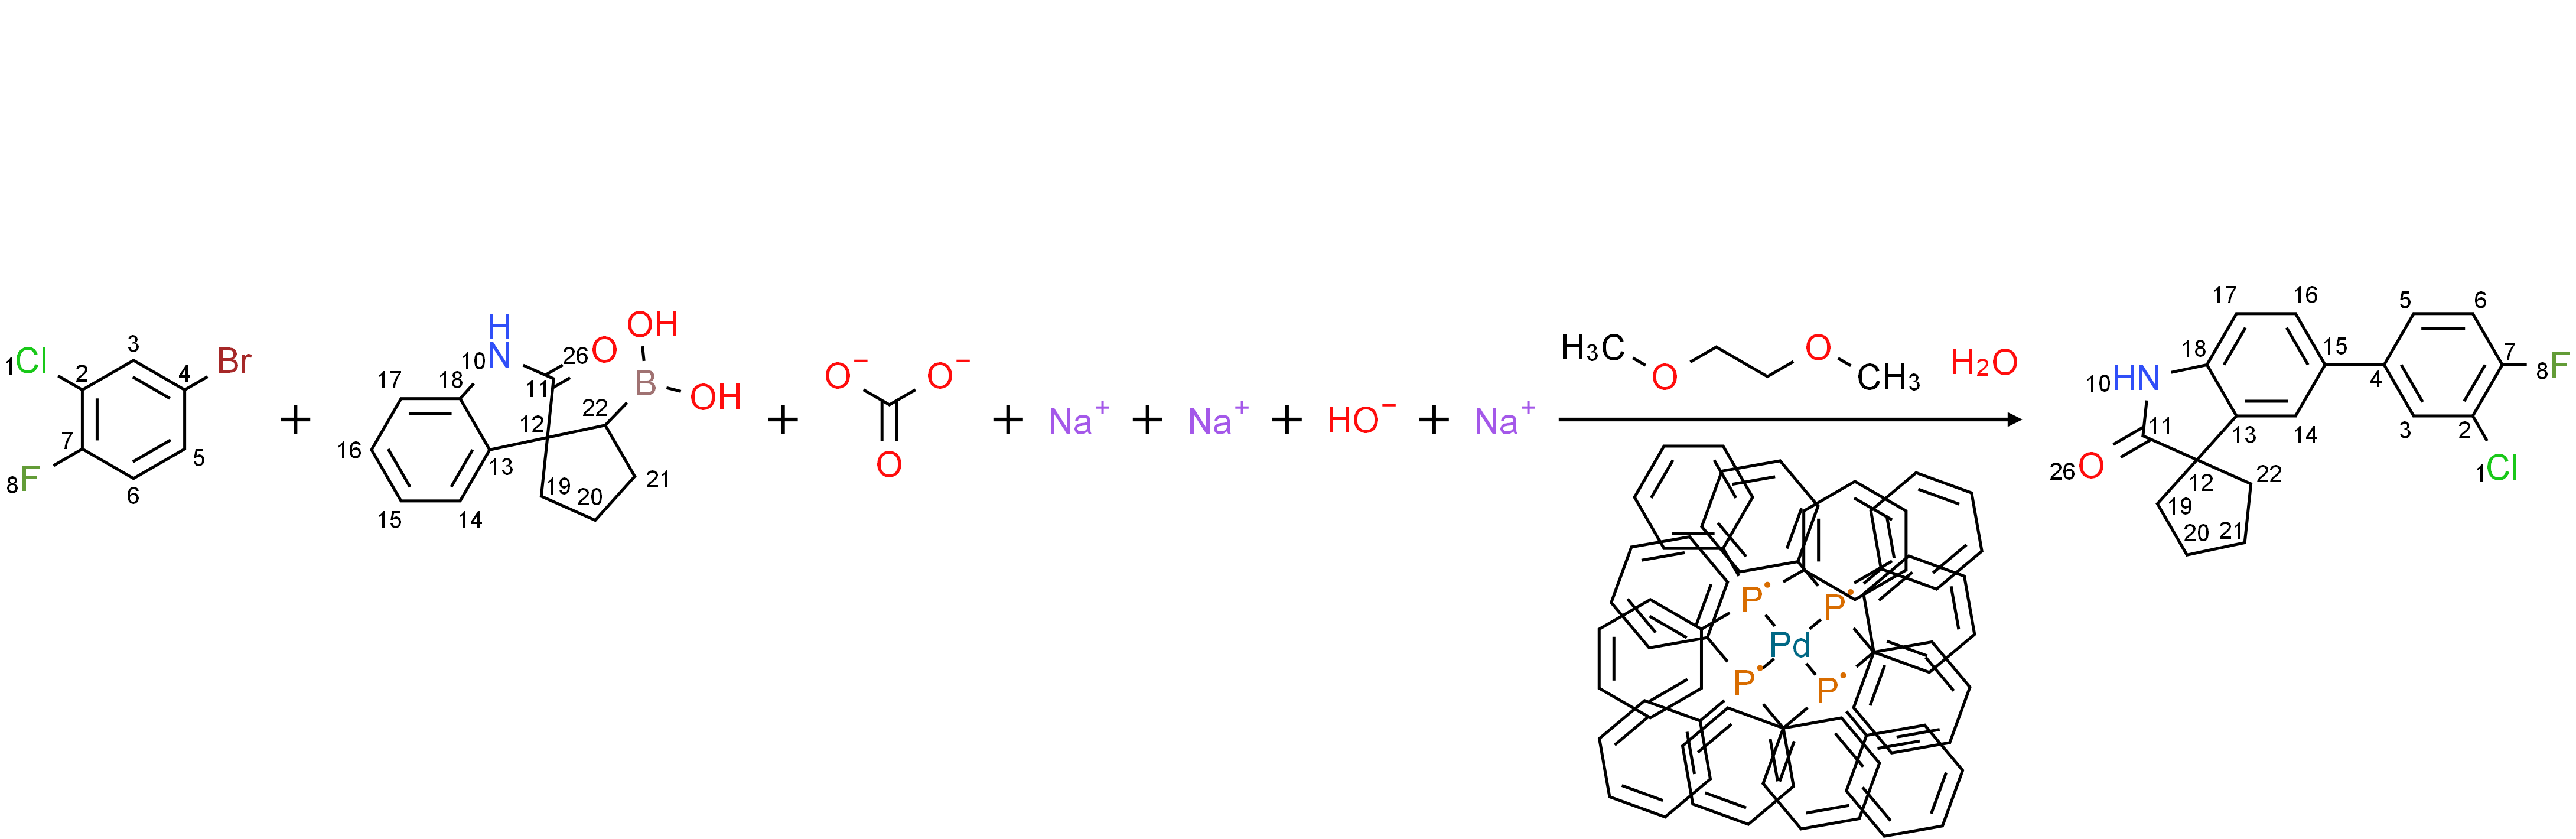

Patent:       US06391907B1
Reaction_id:  ord-d8f365754fa44306b008b2f9ec510ca9
A solution of 3-chloro-4-fluoro-bromobenzene (0.4 cm3, 0.66 g, 3.1 mmol), and tetrakis(triphenylphosphine)palladium(0) (0.2 g) in ethylene glycol dimethyl ether (20 cm3) was stirred under N2 for 20 minutes. To this mixture was then added (spiro[cyclopentane-1,3′-[3H]indol]-2′(1′H)-one-5-yl) boronic acid (1.0 g, 4.7 mmol) and sodium carbonate (1.0 g, 9.4 mmol) in water (5 cm3). The solution was brought to reflux for 18 hours and then cooled to room temperature, poured into 2N NaOH and extracted with EtOAc (×3). The combined extracts were washed with water, brine, dried (MgSO4), and evaporated. The residue was purified by column chromatography (SiO2, EtOAc, hexane) to afford the title compound (0.65 g, 66%) as a pale-yellow solid. mp: 202-204° C.; 1H NMR (DMSO-d6) δ10.4 (s, 1H), 7.9 (dd, 1H, J=2.3, 4.9 Hz), 7.7-7.6 (m, 1H), 7.6 (d, 1H, J=1.5 Hz), 7.5 (s, 1H) 7.4 (d, 1H, J=1.8 Hz), 6.9 (d, 1H, J=8.0 Hz), 2.0-1.9

In [115]:
#TODO fix 5-position structures for spiro structures
draw_reaction(pd_df[suzuki_indigo & ~suzuki_rdkit & (pd_df['patent'] == "US06391907B1")])

## Using dask dataframe

In [116]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
ProgressBar().register()

dds = dd.from_pandas(pd_df['reaction_smile'], npartitions=240)
suzuki_rdkit = dds.apply(is_reaction_of_type,
                         reaction_type_pattern=rdkit_pattern,
                         meta=pd.Series(dtype=bool)).compute(scheduler='processes') # rdkit functions are not parallelizable using "threads"
suzuki_rdkit.sum()

[########################################] | 100% Completed | 13.65 s


33300

In [117]:
query = indigo.loadReactionSmarts(SUZUKI_PATTERN)

def rxn_match(rxn_smiles) -> bool:
    if rxn_smiles is None:
        return False
    return True if indigo.substructureMatcher(indigo.loadReaction(rxn_smiles)).match(query) else False

dds = dd.from_pandas(pd_df['reaction_smile'], npartitions=240)
suzuki_indigo = dds.apply(rxn_match,
                          # rxn_query=query,
                          meta=pd.Series(dtype=bool)).compute(scheduler='threads')
suzuki_indigo.sum()

[########################################] | 100% Completed | 27.09 s


39909

In [118]:
print("{indigo}          : ", suzuki_indigo.sum())
print("{rdkit}           : ", suzuki_rdkit.sum())
print("{indigo} - {rdkit}: ", (suzuki_indigo & ~suzuki_rdkit).sum())
print("{rdkit} - {indigo}: ", (suzuki_rdkit & ~suzuki_indigo).sum())
print("{rdkit} ∪ {indigo}: ", (suzuki_rdkit | suzuki_indigo).sum())
print("{rdkit} ∩ {indigo}: ", (suzuki_rdkit & suzuki_indigo).sum())

{indigo}          :  39909
{rdkit}           :  33300
{indigo} - {rdkit}:  10738
{rdkit} - {indigo}:  4129
{rdkit} ∪ {indigo}:  44038
{rdkit} ∩ {indigo}:  29171


In [ ]:
draw_reaction(pd_df[suzuki_rdkit & ~suzuki_indigo])

## Compare Suzuki substructure searches for all_reactions

In [120]:
dds = dd.from_pandas(all_reactions['reaction_smile'], npartitions=240)
suzuki_rdkit = dds.apply(is_reaction_of_type,
                 reaction_type_pattern=rdkit_pattern,
                 meta=pd.Series(dtype=bool)).compute(scheduler='processes') # rdkit functions are not parallelizable using "threads"
suzuki_rdkit.sum()

[########################################] | 100% Completed | 80.92 s


47471

In [121]:
query = indigo.loadReactionSmarts(SUZUKI_PATTERN)

def rxn_match(rxn_smiles) -> bool:
    if rxn_smiles is None:
        return False
    return True if indigo.substructureMatcher(indigo.loadReaction(rxn_smiles)).match(query) else False

dds = dd.from_pandas(all_reactions['reaction_smile'], npartitions=240)
suzuki_indigo = dds.apply(rxn_match,
                 # args=[query,),
                 # rxn_query=query,
                 meta=pd.Series(dtype=bool)).compute(scheduler='threads')
suzuki_indigo.sum()

[########################################] | 100% Completed | 223.47 s


55759

In [122]:
print("{indigo}          : ", suzuki_indigo.sum())
print("{rdkit}           : ", suzuki_rdkit.sum())
print("{indigo} - {rdkit}: ", (suzuki_indigo & ~suzuki_rdkit).sum())
print("{rdkit} - {indigo}: ", (suzuki_rdkit & ~suzuki_indigo).sum())
print("{rdkit} ∪ {indigo}: ", (suzuki_rdkit | suzuki_indigo).sum())
print("{rdkit} ∩ {indigo}: ", (suzuki_rdkit & suzuki_indigo).sum())

{indigo}          :  55759
{rdkit}           :  47471
{indigo} - {rdkit}:  14734
{rdkit} - {indigo}:  6446
{rdkit} ∪ {indigo}:  62205
{rdkit} ∩ {indigo}:  41025


C:\Users\ergot\AppData\Local\Temp\ipykernel_28396\161612218.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  draw_reaction(all_reactions[suzuki_rdkit & ~suzuki_indigo])


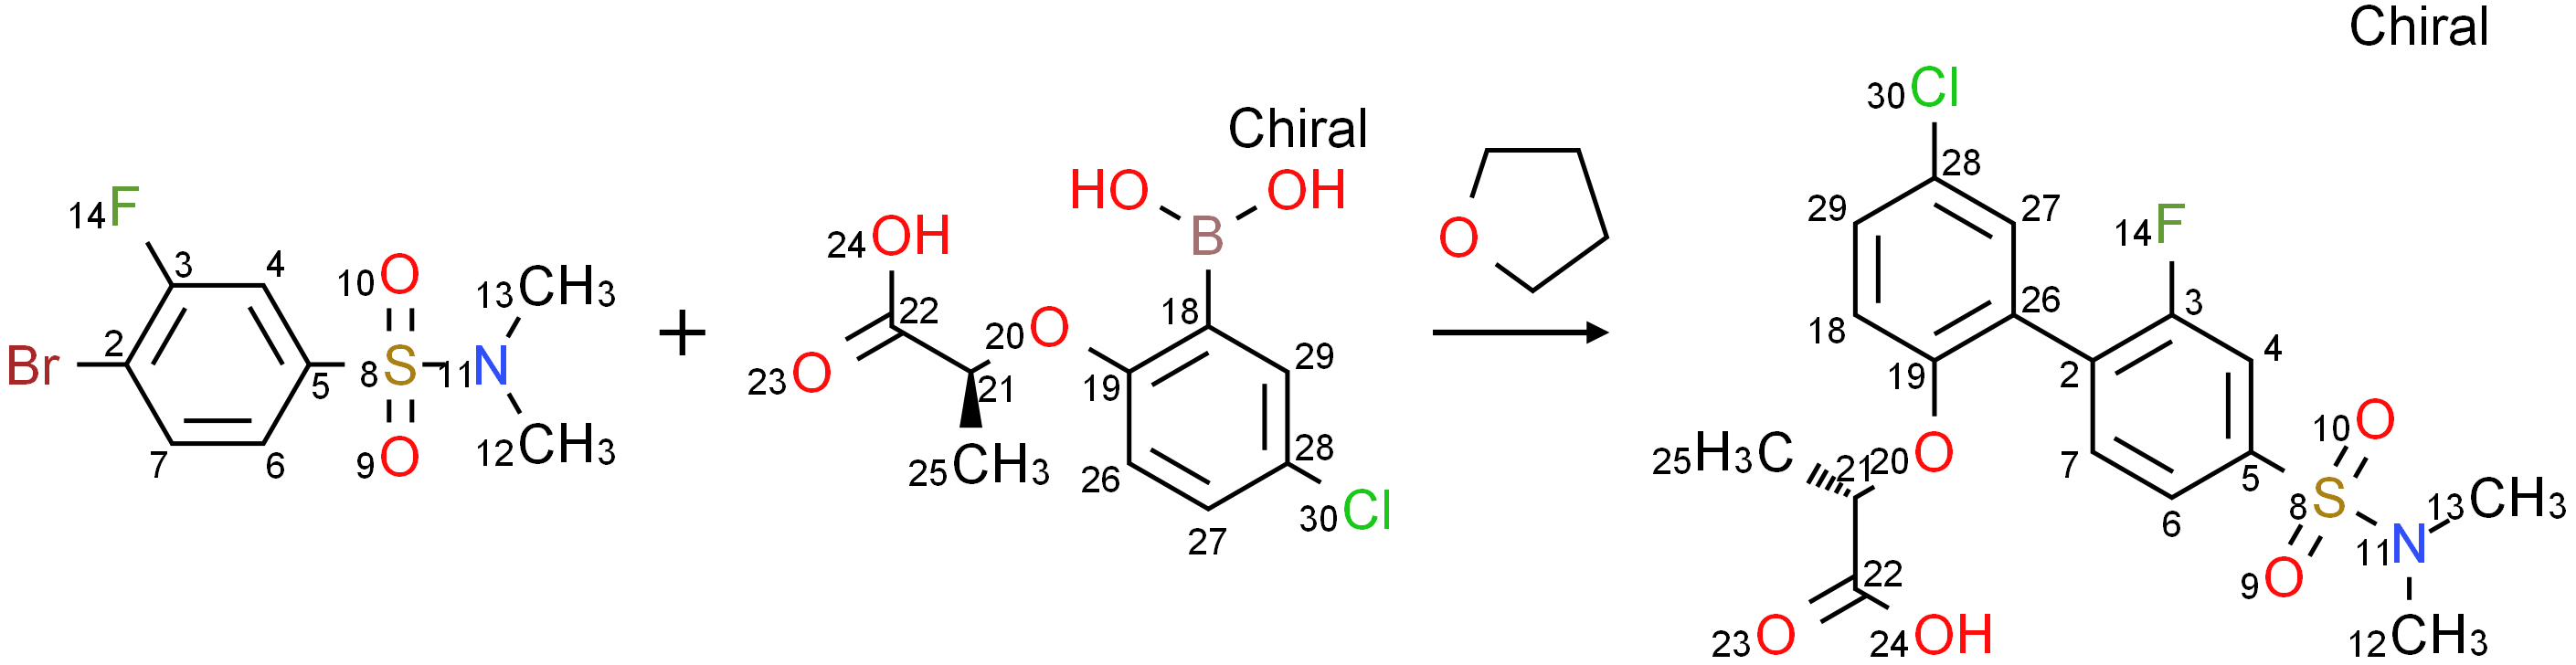

Patent:       US08158820B2
Reaction_id:  ord-633fe93bad1f424bbc721c3efd4c7359
The title compound was prepared by the method of example 144 step (i) using the product from step (i), the product from example 151 step (iv) and THF as solvent.


In [139]:
# unique to rdkit
draw_reaction(all_reactions[suzuki_rdkit & ~suzuki_indigo])